# Tugas 1 Image Processing

In [7]:
from PIL import Image, ImageFont, ImageDraw
import requests
from io import BytesIO
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
url = 'https://images.unsplash.com/photo-1455894127589-22f75500213a?ixid=MXwxMjA3fDB8MHxzZWFyY2h8OHx8bGFwdG9wJTIwb24lMjBkZXNrfGVufDB8fDB8&ixlib=rb-1.2.1&w=1000&q=80'

## Import photo dari url

In [11]:
response = requests.get(url) # Dibedakan agar request tidak selalu request ketika di restart

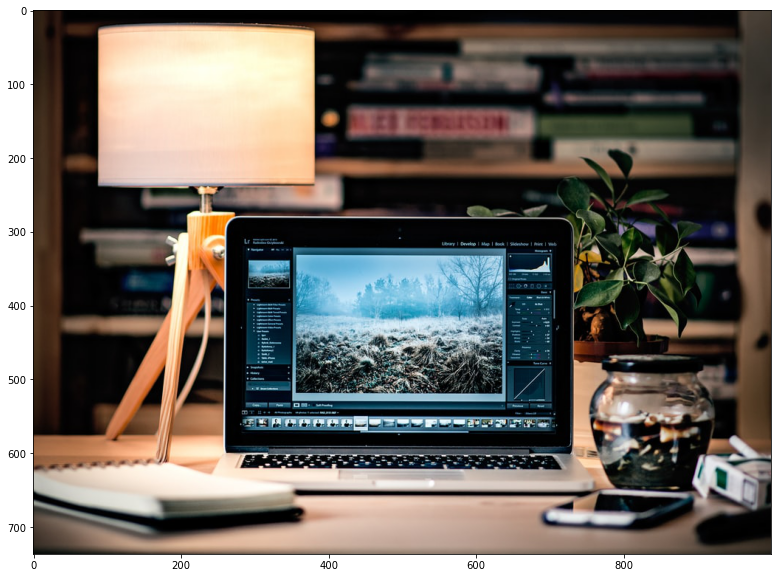

In [156]:
img = Image.open(BytesIO(response.content)) 
img.save("unedited.png") # Pertama-tama di save terlebih dahulu dari hasil request
plt.figure(figsize=(30,10))
plt.imshow(img)

## Blurring

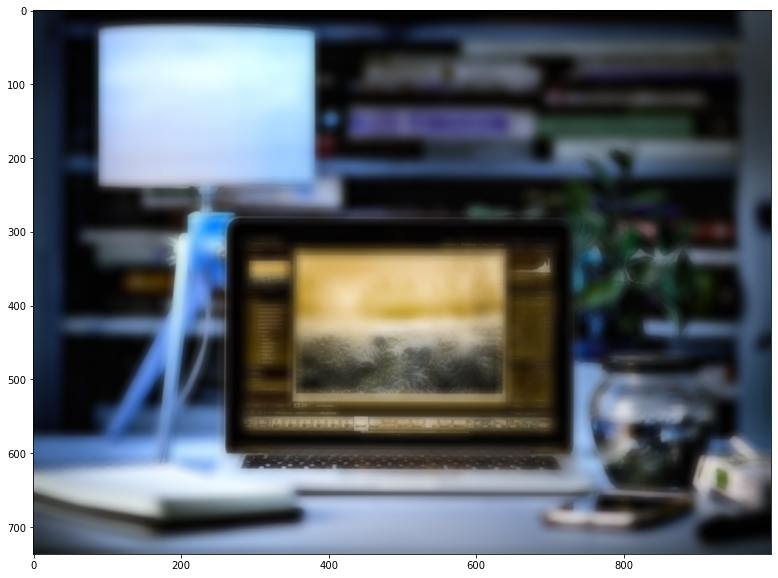

In [171]:
im_edit = cv2.imread("unedited.png")
blurred = cv2.bilateralFilter(im_edit,24,450,650) # Bilateral Filter terlebih dahulu
kernel = np.ones((2,2),np.float32)/4
blurred = cv2.filter2D(blurred,-1,kernel) # dilakukan blurring
cv2.imwrite('blurred.png',blurred)
plt.figure(figsize=(30,10))
plt.imshow(blurred)

## Image Manipulation

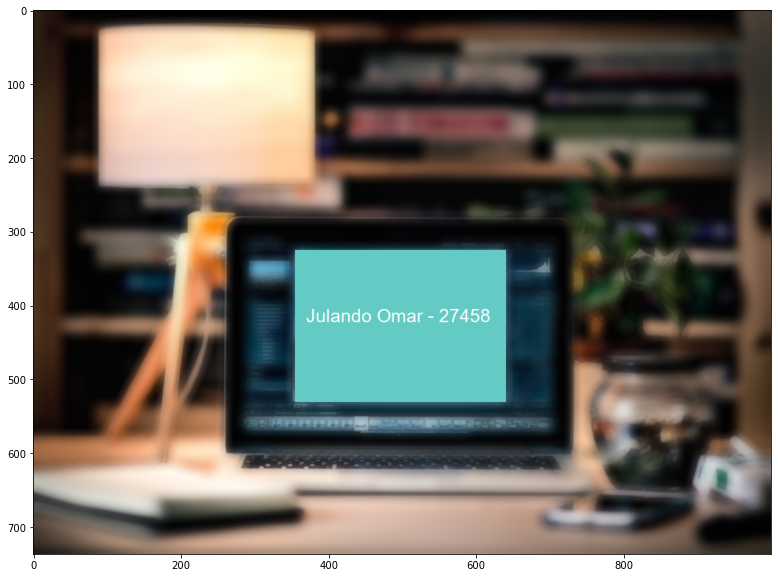

In [172]:
img = Image.open("blurred.png")
draw = ImageDraw.Draw(img)
draw.rectangle((355, 325, 640, 530), fill=(99, 203, 196)) #Mengambar Kotak
font = ImageFont.truetype("arial.ttf", 25)
draw.text((370,400),"Julando Omar - 27458",font=font) #meletakan teks
del draw
img.save("edited.png") #melakukan saving thdp file yang ada
plt.figure(figsize=(30,10))
plt.imshow(img)

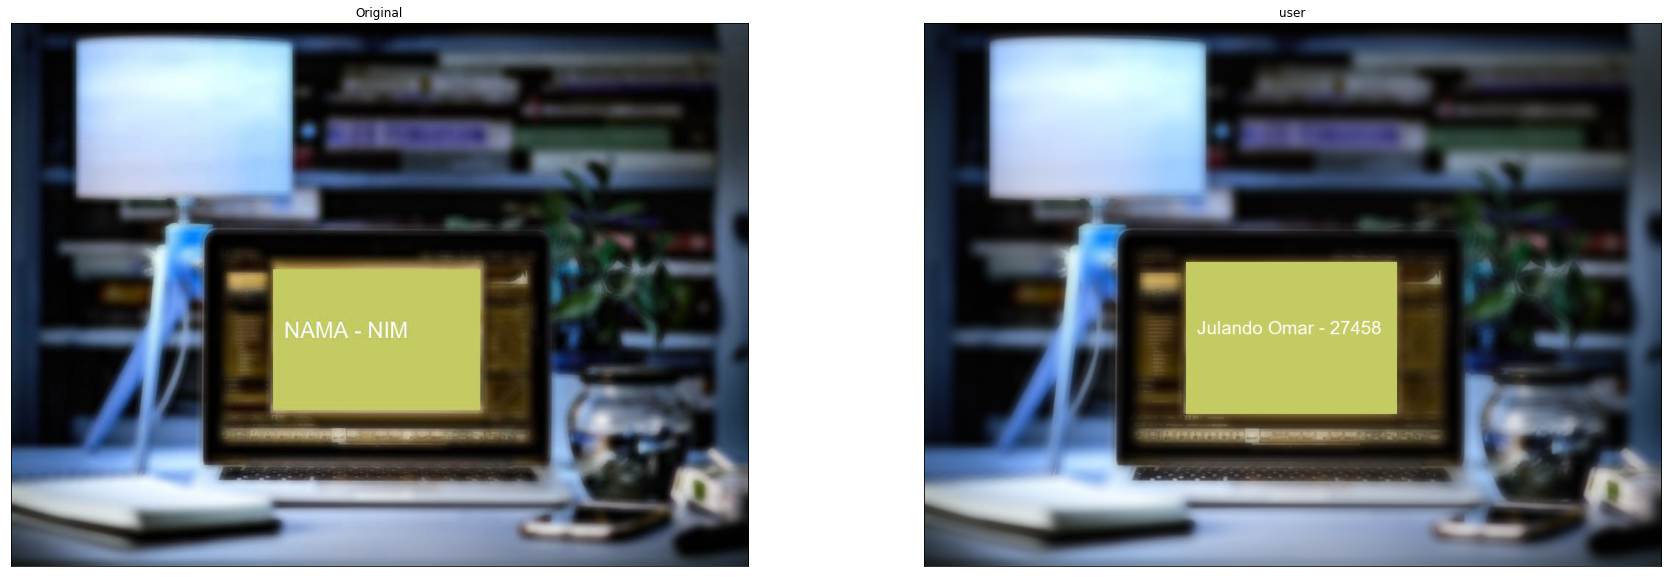

In [174]:
original = cv2.imread("output.jpeg")
user = cv2.imread("edited.png")

plt.figure(figsize=(30,10))
plt.subplot(121),plt.imshow(original),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(user),plt.title('user')
plt.xticks([]), plt.yticks([])
plt.show()